In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Nilaya31/Task-6_7/main/train.csv")
df.head()

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.95577,0.0,8.14,0,0.538,6.047,88.8,4.4534,4,307.0,21.0,306.38,17.28,14.8
1,1,0.02875,28.0,15.04,0,0.464,6.211,28.9,3.6659,4,270.0,18.2,396.33,6.21,25.0
2,2,1.22358,0.0,19.58,0,0.605,6.943,97.4,1.8773,5,403.0,14.7,363.43,4.59,41.3
3,3,5.66637,0.0,18.10,0,0.740,6.219,100.0,2.0048,24,666.0,20.2,395.69,16.59,18.4
4,4,0.04544,0.0,3.24,0,0.460,6.144,32.2,5.8736,4,430.0,16.9,368.57,9.09,19.8


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       400 non-null    int64  
 1   CRIM     400 non-null    float64
 2   ZN       400 non-null    float64
 3   INDUS    400 non-null    float64
 4   CHAS     400 non-null    int64  
 5   NOX      400 non-null    float64
 6   RM       400 non-null    float64
 7   AGE      400 non-null    float64
 8   DIS      400 non-null    float64
 9   RAD      400 non-null    int64  
 10  TAX      400 non-null    float64
 11  PTRATIO  400 non-null    float64
 12  B        400 non-null    float64
 13  LSTAT    400 non-null    float64
 14  MEDV     400 non-null    float64
dtypes: float64(12), int64(3)
memory usage: 47.0 KB


In [4]:
df.isnull().sum()

ID         0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [5]:
df.shape

(400, 15)

In [6]:
df = df.drop_duplicates()

In [8]:
df.shape

(400, 15)

OUTLIERS EXIST OR NOT and EDA 

In [10]:
s = df.describe().T
s

,count,mean,std,min,25%,50%,75%,max
ID,400.0,199.500000,115.614301,0.00000,99.75000,199.50000,299.250000,399.0000
CRIM,400.0,3.757191,9.155496,0.00906,0.07782,0.24217,3.543427,88.9762
ZN,400.0,10.970000,22.796261,0.00000,0.00000,0.00000,12.500000,95.0000
INDUS,400.0,10.936425,6.848042,0.46000,5.13000,8.56000,18.100000,27.7400
CHAS,400.0,0.072500,0.259639,0.00000,0.00000,0.00000,0.000000,1.0000
NOX,400.0,0.552817,0.115488,0.38500,0.44900,0.53200,0.624000,0.8710
RM,400.0,6.292165,0.709923,4.13800,5.87750,6.20850,6.620500,8.7800
AGE,400.0,68.086000,28.386888,2.90000,42.37500,76.95000,93.825000,100.0000
DIS,400.0,3.819462,2.132445,1.12960,2.10915,3.27210,5.214600,12.1265
RAD,400.0,9.462500,8.687478,1.00000,4.00000,5.00000,24.000000,24.0000


In [11]:
def outlierpresence(df):
  for i in df.keys():
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    s = (df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))
    # df[s.isin([True])]
    substring = 'True'
    y= s[s.apply(lambda row: row.astype(str).str.contains(substring, case=False).any(), axis=1)] #IT WILL GIVE ALL OUTLIERS IN THE DATAFRAME WITH ALL COLUMNS
    if True in y[i].tolist(): #HERE WE CHECK True is in the list of particular column
      print('Outliers', '\033[1m'+ 'present' +'\033[0m', 'in the data of','\033[1m' + i + '\033[0m')
      print('-------------------------------')
    else:
      print('Outliers', '\033[1m'+ ' not present in the data of' +'\033[0m', 'in','\033[1m' + i + '\033[0m') 
      print('-------------------------------') 
outlierpresence(df)

Outliers  not present in the data of in ID
-------------------------------
Outliers present in the data of CRIM
-------------------------------
Outliers present in the data of ZN
-------------------------------
Outliers  not present in the data of in INDUS
-------------------------------
Outliers present in the data of CHAS
-------------------------------
Outliers  not present in the data of in NOX
-------------------------------
Outliers present in the data of RM
-------------------------------
Outliers  not present in the data of in AGE
-------------------------------
Outliers present in the data of DIS
-------------------------------
Outliers  not present in the data of in RAD
-------------------------------
Outliers  not present in the data of in TAX
-------------------------------
Outliers present in the data of PTRATIO
-------------------------------
Outliers present in the data of B
-------------------------------
Outliers present in the data of LSTAT
---------------------------

In [12]:
def loweruppwhisker(df):
  for i in df.keys():
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    whisker_width = 1.5
    lower_whisker = Q1 -(whisker_width*IQR)
    upper_whisker = Q3 + (whisker_width*IQR)
    print('\033[1m' + i + '\033[0m')
    print('-------------------------')
    print("Lowe whisker: ",lower_whisker)
    print("Upper whisker: ", upper_whisker)
    print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
loweruppwhisker(df)

ID
-------------------------
Lowe whisker:  -199.5
Upper whisker:  598.5
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
CRIM
-------------------------
Lowe whisker:  -5.1205912499999995
Upper whisker:  8.74183875
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
ZN
-------------------------
Lowe whisker:  -18.75
Upper whisker:  31.25
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
INDUS
-------------------------
Lowe whisker:  -14.325000000000006
Upper whisker:  37.55500000000001
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
CHAS
-------------------------
Lowe whisker:  0.0
Upper whisker:  0.0
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
NOX
-------------------------
Lowe whisker:  0.18650000000000005
Upper whisker:  0.8865
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
RM
-------------------------
Lowe whisker:  4.763000000000002
Upper whisker:  7.734999999999999
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
AGE
-------------------------
Lowe whisker:  -34.80000000000001
Upper whisker:  171.0
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
DIS
-------------------------
Lowe whisker:  -2.549025
Upper whi

In [13]:
for k, v in df.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  irq = q3 - q1
  v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
  print("Column %s outliers = %.2f%%" % (k, perc))

Column ID outliers = 0.00%
Column CRIM outliers = 13.25%
Column ZN outliers = 13.00%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 6.25%
Column AGE outliers = 0.00%
Column DIS outliers = 1.25%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 3.25%
Column B outliers = 14.50%
Column LSTAT outliers = 1.50%
Column MEDV outliers = 8.00%


<AxesSubplot:>

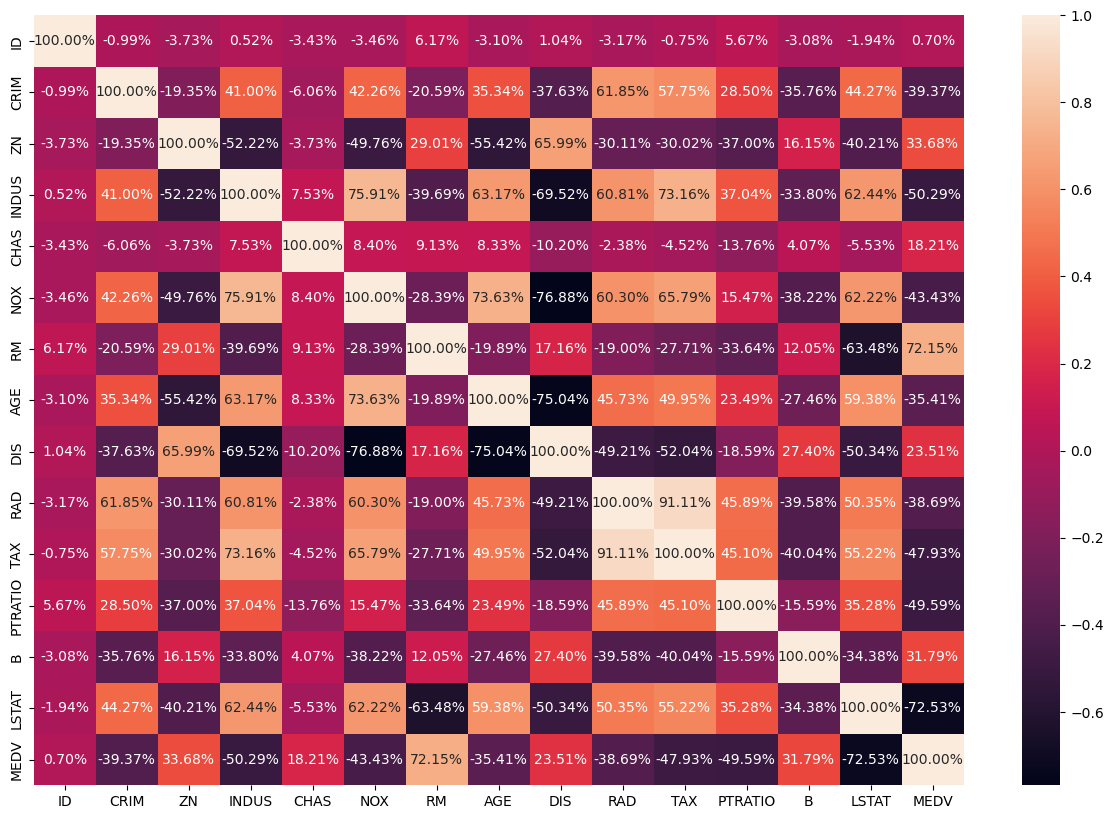

In [15]:
plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), annot = True, fmt = '.2%')

In [16]:
sns.set_theme()

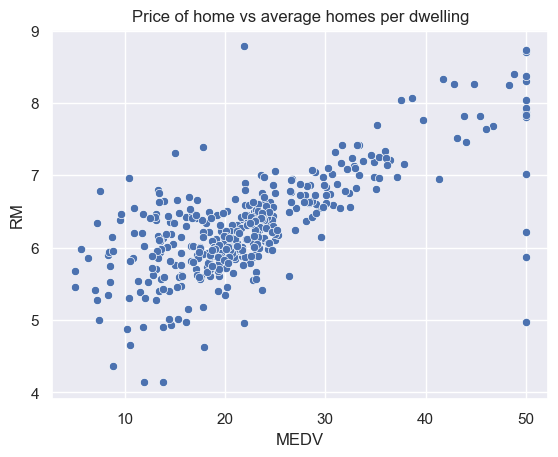

In [18]:
plt.title('Price of home vs average homes per dwelling')
sns.scatterplot(data=df, x=df['MEDV'], y=df['RM'])
plt.show()

In [19]:
df[['MEDV','RM']].corr()

,MEDV,RM
MEDV,1.000000,0.721489
RM,0.721489,1.000000


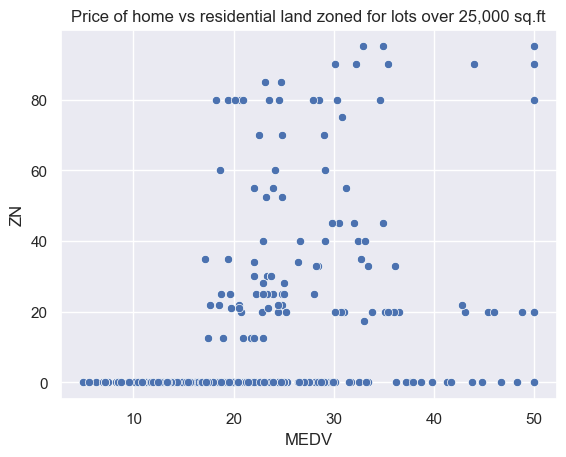

In [20]:
plt.title('Price of home vs residential land zoned for lots over 25,000 sq.ft')
sns.scatterplot(data=df, x=df['MEDV'], y=df['ZN'])
plt.show()

In [21]:
df[['MEDV','ZN']].corr()

,MEDV,ZN
MEDV,1.000000,0.336805
ZN,0.336805,1.000000


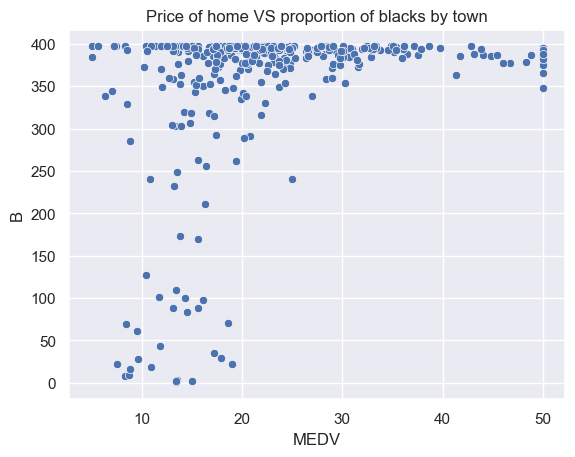

,MEDV,B
MEDV,1.00000,0.31791
B,0.31791,1.00000


In [22]:
plt.title('Price of home VS proportion of blacks by town')
sns.scatterplot(data=df, x=df['MEDV'], y=df['B'])
plt.show()
df[['MEDV','B']].corr()

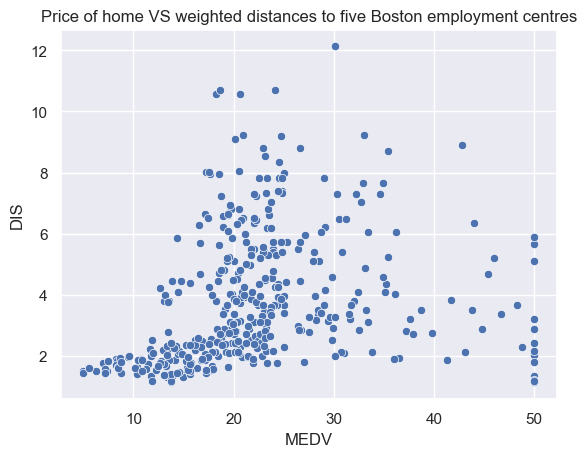

,MEDV,DIS
MEDV,1.000000,0.235087
DIS,0.235087,1.000000


In [23]:
plt.title('Price of home VS weighted distances to five Boston employment centres')
sns.scatterplot(data=df, x=df['MEDV'], y=df['DIS'])
plt.show()
df[['MEDV','DIS']].corr()

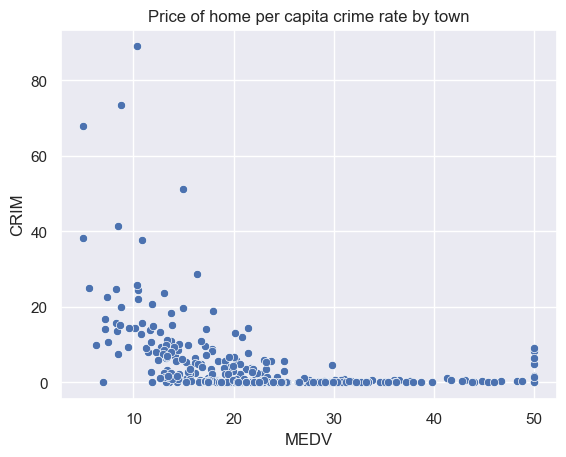

,MEDV,CRIM
MEDV,1.000000,-0.393693
CRIM,-0.393693,1.000000


In [24]:
plt.title('Price of home per capita crime rate by town')
sns.scatterplot(data=df, x=df['MEDV'], y=df['CRIM'])
plt.show()
df[['MEDV','CRIM']].corr()

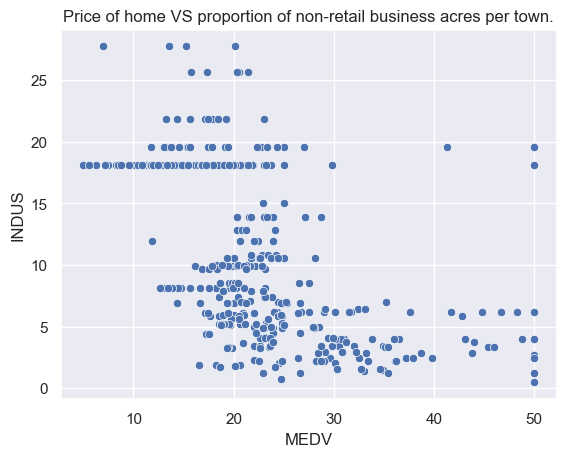

,MEDV,INDUS
MEDV,1.000000,-0.502898
INDUS,-0.502898,1.000000


In [25]:
plt.title('Price of home VS proportion of non-retail business acres per town.')
sns.scatterplot(data=df, x=df['MEDV'], y=df['INDUS'])
plt.show()
df[['MEDV','INDUS']].corr()

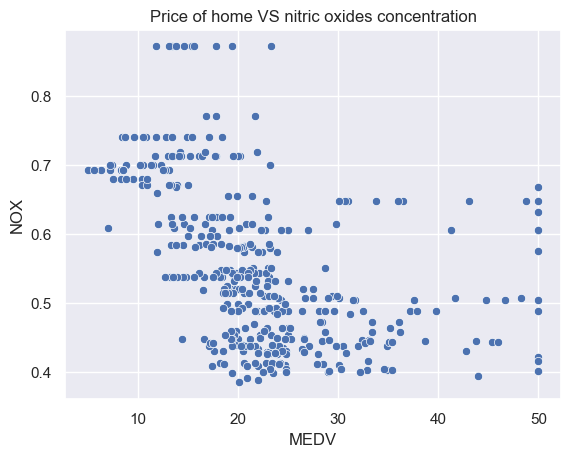

,MEDV,NOX
MEDV,1.000000,-0.434271
NOX,-0.434271,1.000000


In [26]:
plt.title('Price of home VS nitric oxides concentration')
sns.scatterplot(data=df, x=df['MEDV'], y=df['NOX'])
plt.show()
df[['MEDV','NOX']].corr()

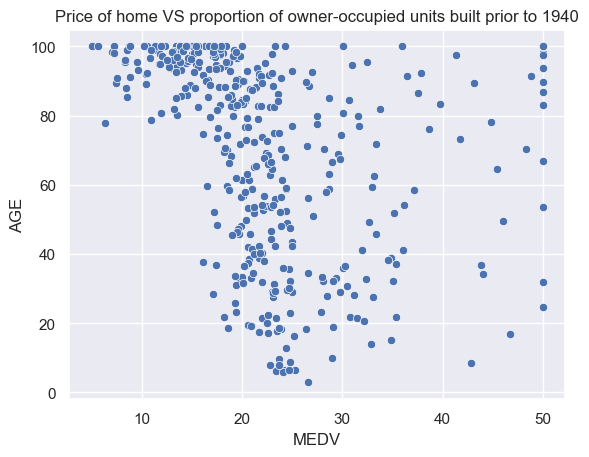

,MEDV,AGE
MEDV,1.000000,-0.354106
AGE,-0.354106,1.000000


In [27]:
plt.title('Price of home VS proportion of owner-occupied units built prior to 1940')
sns.scatterplot(data=df, x=df['MEDV'], y=df['AGE'])
plt.show()
df[['MEDV','AGE']].corr()

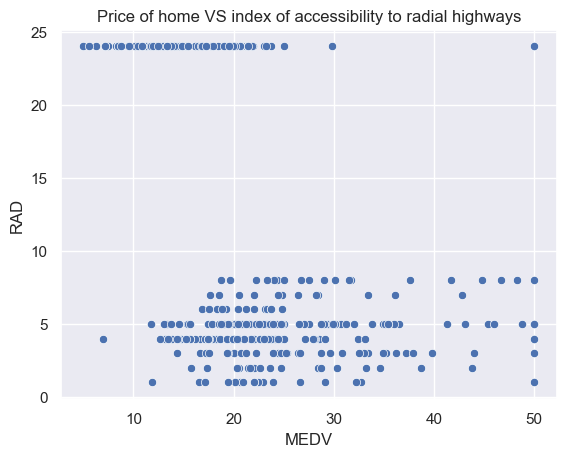

,MEDV,RAD
MEDV,1.000000,-0.386922
RAD,-0.386922,1.000000


In [28]:
plt.title('Price of home VS index of accessibility to radial highways')
sns.scatterplot(data=df, x=df['MEDV'], y=df['RAD'])
plt.show()
df[['MEDV','RAD']].corr()

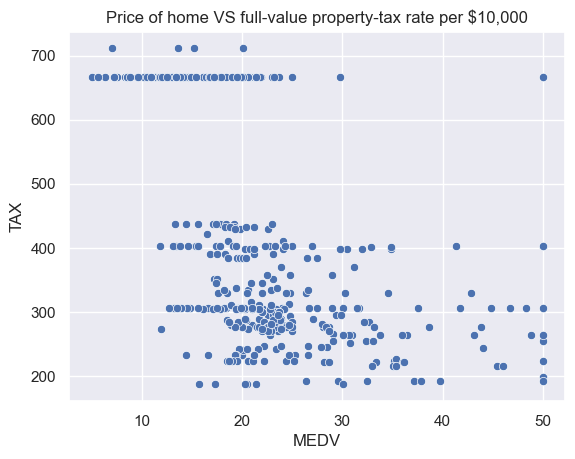

,MEDV,TAX
MEDV,1.000000,-0.479308
TAX,-0.479308,1.000000


In [29]:
plt.title('Price of home VS full-value property-tax rate per $10,000')
sns.scatterplot(data=df, x=df['MEDV'], y=df['TAX'])
plt.show()
df[['MEDV','TAX']].corr()
     

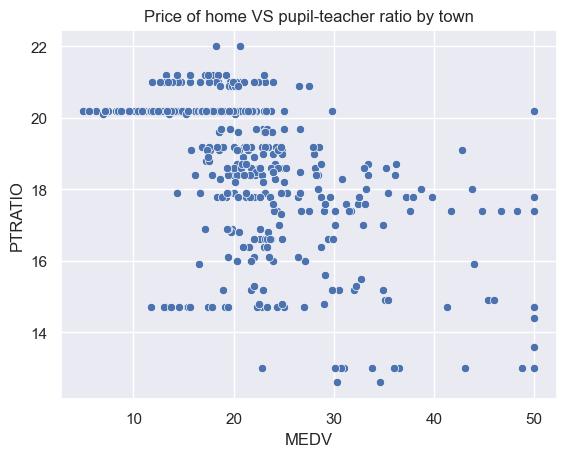

,MEDV,PTRATIO
MEDV,1.000000,-0.495904
PTRATIO,-0.495904,1.000000


In [30]:
plt.title('Price of home VS pupil-teacher ratio by town')
sns.scatterplot(data=df, x=df['MEDV'], y=df['PTRATIO'])
plt.show()
df[['MEDV','PTRATIO']].corr()

In [31]:
b = []
for i in df.keys():
  b.append(i)
print(b) 
     

['ID', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


In [32]:
b.remove('ID')
b.remove('MEDV')
print(b)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


In [33]:
X = df[b].values#array of features
y = df['MEDV'].values

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [35]:
from sklearn.preprocessing import StandardScaler ## standrard scalig 
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train,y_train) # we are finding the values of mean and sd from the td
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data 

In [36]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [37]:
coeff_df = pd.DataFrame(regressor.coef_,[b], columns=['Coefficient'])
y_pred = regressor.predict(X_test_scaled)
coeff_df

,Coefficient
CRIM,-0.890760
ZN,0.856409
INDUS,-0.080591
CHAS,0.866069
NOX,-2.118463
RM,3.099368
AGE,0.008133
DIS,-2.953137
RAD,2.720346
TAX,-2.261846


In [38]:
print(y_pred)

[13.6693765  19.95899205 24.84532881 26.02779473 19.55934583 23.05863669
 23.26033434 13.85955083 22.14356845 18.05511774 31.98639236 22.79226541
 38.87055984 22.35835412 22.97612654 23.50943965 21.08853606 16.21021809
 22.9290802  31.14624403 23.26738248 13.73844171 25.98112972 25.84530626
 32.74545173 24.90319794 24.34607324 10.66390987 27.52040251 20.85014271
 18.29452628 17.11405755 24.55918521 24.19637341 23.45473985 24.92899963
 24.94147845 17.04910812 21.51786957 28.9582054  28.022454   24.9600842
 14.93679211 28.51696658  7.56278531 20.73488734 23.27288227 17.74408874
 22.19736005 30.91186374 15.99548172 22.64634981 22.67983312 28.91909404
 17.28934571 23.2878774  20.06423087 41.58690182 19.82481793 17.79847501
 28.13354487 17.13784569 21.91373217 28.51630621 20.42290114 19.21725804
 22.22006113 16.12836918 24.01812773 14.97590888 15.53011443 15.32272934
 18.6464185  30.8024034  14.18606553 34.30066326 15.51249456 13.06626886
 21.16743837 20.52172074]


In [39]:
regressor.intercept_ 

22.824375000000025

In [40]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,13.3,13.669376
1,19.9,19.958992
2,23.1,24.845329
3,22.2,26.027795
4,18.9,19.559346
...,...,...
75,26.7,34.300663
76,17.4,15.512495
77,15.6,13.066269
78,21.0,21.167438


In [41]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.7301688841176439


In [42]:
from sklearn.feature_selection import RFE
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_train_scaled, y_train)
sorted(list(zip(selector.ranking_,b)))

[(1, 'DIS'),
 (1, 'LSTAT'),
 (1, 'RM'),
 (2, 'NOX'),
 (3, 'PTRATIO'),
 (4, 'RAD'),
 (5, 'TAX'),
 (6, 'CRIM'),
 (7, 'ZN'),
 (8, 'CHAS'),
 (9, 'B'),
 (10, 'INDUS'),
 (11, 'AGE')]

In [43]:
df1 = pd.read_csv("https://raw.githubusercontent.com/Nilaya31/Task-6_7/main/train.csv")

In [44]:
df1.head()

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.95577,0.0,8.14,0,0.538,6.047,88.8,4.4534,4,307.0,21.0,306.38,17.28,14.8
1,1,0.02875,28.0,15.04,0,0.464,6.211,28.9,3.6659,4,270.0,18.2,396.33,6.21,25.0
2,2,1.22358,0.0,19.58,0,0.605,6.943,97.4,1.8773,5,403.0,14.7,363.43,4.59,41.3
3,3,5.66637,0.0,18.10,0,0.740,6.219,100.0,2.0048,24,666.0,20.2,395.69,16.59,18.4
4,4,0.04544,0.0,3.24,0,0.460,6.144,32.2,5.8736,4,430.0,16.9,368.57,9.09,19.8


In [59]:
c = []
for i in df1.keys():
  c.append(i)
print(c)

['ID', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


In [60]:
c.remove('ID')

In [61]:
c.remove('MEDV')

In [62]:
X = df1[c].values
print(X)

[[9.55770e-01 0.00000e+00 8.14000e+00 ... 2.10000e+01 3.06380e+02
  1.72800e+01]
 [2.87500e-02 2.80000e+01 1.50400e+01 ... 1.82000e+01 3.96330e+02
  6.21000e+00]
 [1.22358e+00 0.00000e+00 1.95800e+01 ... 1.47000e+01 3.63430e+02
  4.59000e+00]
 ...
 [6.65492e+00 0.00000e+00 1.81000e+01 ... 2.02000e+01 3.96900e+02
  1.39900e+01]
 [1.31170e-01 0.00000e+00 8.56000e+00 ... 2.09000e+01 3.87690e+02
  1.40900e+01]
 [6.46600e-02 7.00000e+01 2.24000e+00 ... 1.48000e+01 3.68240e+02
  4.97000e+00]]


In [63]:
X_test_scale = scaler.transform(X) #scale the data of features X

In [64]:
y_testpred = regressor.predict(X_test_scale) 

In [65]:
print(y_testpred)

[15.2638177  28.51696658 32.81351884 18.39838597 21.91373217 16.12836918
 14.93679211 15.53011443 20.224916   18.61846039 41.58690182 29.13101209
 22.97612654  6.79937047 34.30066326 10.66390987 21.59287373 21.84387102
 32.89102921 18.06635963 30.8024034  24.72412902 17.01782623 26.51671958
 25.49587891 35.42413166 19.82481793 27.47719105 25.84262602 21.57593069
 21.76609893 19.54599293 22.45809598 25.31127588 19.37389449  5.96055835
 25.29752819 31.98639236 20.80203931 19.0473935  30.24690644 23.75709847
 35.2262291  18.87482194 30.90903567 17.79847501 32.81916262 13.19022408
 20.10600688 17.78447274  6.11353985 13.62172063 20.06423087 20.49954585
 20.73488734 10.51228177 23.84659472 23.40548065 31.44105492 23.50943965
 23.05863669  5.83020334 11.66201864 21.36454479 15.6645638  23.45473985
 20.98820336 13.12561459 18.6464185  33.27393035 24.39594092 27.41071906
 21.93902077 25.12768384 28.13354487 25.84570515 24.92899963 23.6432328
 24.34607324 22.01900693  1.0833891  35.00566023 27.

In [74]:
df1['MEDV'] = y_testpred

In [75]:
df1.head()

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.95577,0.0,8.14,0,0.538,6.047,88.8,4.4534,4,307.0,21.0,306.38,17.28,15.263818
1,1,0.02875,28.0,15.04,0,0.464,6.211,28.9,3.6659,4,270.0,18.2,396.33,6.21,28.516967
2,2,1.22358,0.0,19.58,0,0.605,6.943,97.4,1.8773,5,403.0,14.7,363.43,4.59,32.813519
3,3,5.66637,0.0,18.10,0,0.740,6.219,100.0,2.0048,24,666.0,20.2,395.69,16.59,18.398386
4,4,0.04544,0.0,3.24,0,0.460,6.144,32.2,5.8736,4,430.0,16.9,368.57,9.09,21.913732


In [78]:
df1['output'] = y_testpred
df1.head()

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,output
0,0,0.95577,0.0,8.14,0,0.538,6.047,88.8,4.4534,4,307.0,21.0,306.38,17.28,15.263818,15.263818
1,1,0.02875,28.0,15.04,0,0.464,6.211,28.9,3.6659,4,270.0,18.2,396.33,6.21,28.516967,28.516967
2,2,1.22358,0.0,19.58,0,0.605,6.943,97.4,1.8773,5,403.0,14.7,363.43,4.59,32.813519,32.813519
3,3,5.66637,0.0,18.10,0,0.740,6.219,100.0,2.0048,24,666.0,20.2,395.69,16.59,18.398386,18.398386
4,4,0.04544,0.0,3.24,0,0.460,6.144,32.2,5.8736,4,430.0,16.9,368.57,9.09,21.913732,21.913732


In [80]:
df1 = df1[['ID','output']]
df1

,ID,output
0,0,15.263818
1,1,28.516967
2,2,32.813519
3,3,18.398386
4,4,21.913732
...,...,...
395,395,31.298957
396,396,23.001520
397,397,19.355511
398,398,20.814275


In [81]:
df1.to_csv('Output.csv', index=False)

In [82]:
X=df1["ID"]
y=df1["output"]
     

optimal value w is  0.08516503578546768


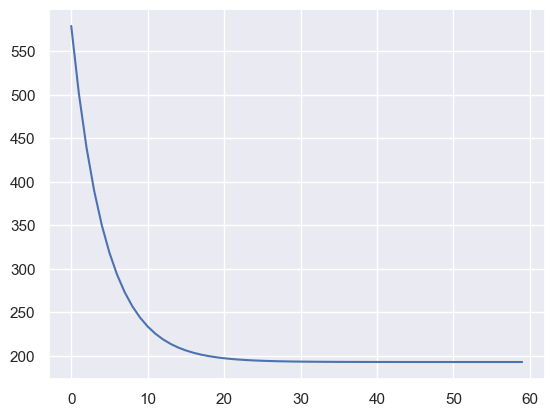

In [83]:
#cost function 
def single_point_cost(x,y,w):   
    y_pred= w * x
    cost=( y_pred - y) **2  #linear regression
    return cost
#calculating derivative of each point
#grad function
def grad(x,y,w,):
    grad_w=2 * x * ((w * x) - y ) # derevative with respect to x
    return grad_w
     

w=0 # here we have  only one parameter
gamma=0.000001 #learning rate
all_costs=[]
for k in range(60):
    cost=0
    for i in range(len(X)):
        a=single_point_cost(X[i],y[i],w)
        cost+=a
    
    cost1=cost/len(X)  #average cost
    all_costs.append(cost1)
    grad_w=0
    for j in range(len(X)):
        b=grad(X[j],y[j],w)
        grad_w+=b
    grad_w1=grad_w/len(X)  #avearge grad
    w= w -  (gamma * grad_w1)  # in batch gradient descent update happens only one time
     

print("optimal value w is ",w) #optimal value of w
epochs=np.arange(60)
plt.plot(epochs,all_costs)

optimal value w is  0.06261856516012476


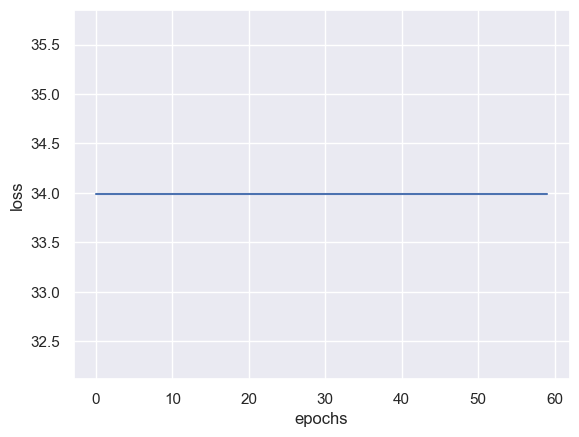

In [84]:
all_costs23=[]
w=0
gamma=0.000001
for k in range(60):
    for i in range(len(X)):
        cost21=single_point_cost(X[i],y[i],w)
        grad_w21=grad(X[i],y[i],w)
        w= w- (gamma * grad_w21) # in sgd update takes place after every point
    all_costs23.append(cost21)

print("optimal value w is ",w) #optimal value of w
plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot(epochs,all_costs23)

optimal value w is  0.7800582446271651


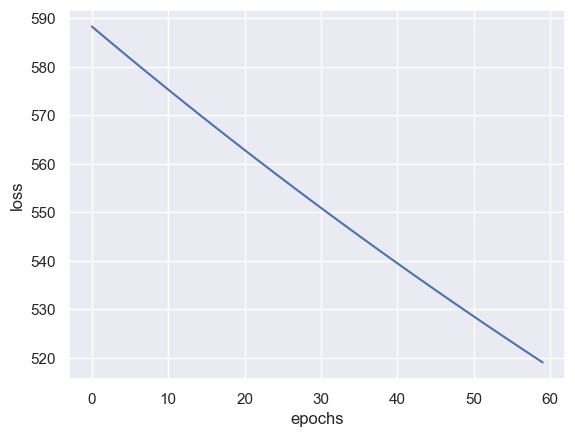

In [85]:
# let our batch size = 5
#so we will have 2 batches because n=10  and updates will happen 2 times 
w=0
gamma=0.000001
batch_size= 5
all_costs41=[]
for k in range(60):
    for j in range(int(len(X)/batch_size)):
        cost4=0
        for i in range(batch_size):
            z1=single_point_cost(X[i],y[i],w)
            cost4+=z1
        if j==1:
            all_costs41.append(cost4/batch_size) #avearge cost of that batch
        grad_w41=0
        for n in range(batch_size):
            f1=grad(X[i],y[i],w)
            grad_w41+=f1
    
        grad_w42=grad_w41/batch_size  #average grad of that function

        w= w- (gamma * grad_w42)  # update takes place after every batch

print("optimal value w is ",w) #optimal value of w
plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot(epochs,all_costs41)
     

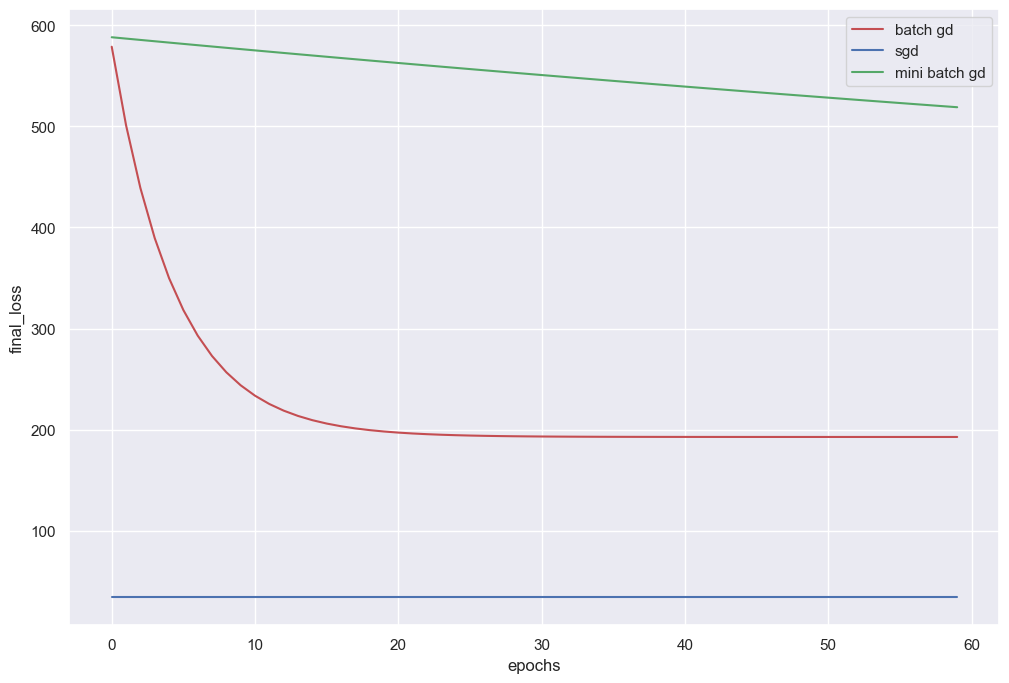

In [86]:
plt.figure(figsize=(12,8))
plt.plot(epochs,all_costs,c='r',label="batch gd")
plt.plot(epochs,all_costs23,c='b',label="sgd")
plt.plot(epochs,all_costs41,c='g',label="mini batch gd")
plt.xlabel("epochs")
plt.ylabel("final_loss")
plt.legend()
plt.show()
